# **🌐 FIAP x DASA CHALLENGE 2025 - SPRINT 4**
## 🐍 Dynamic Programing

## 🧩 **DESAFIO:** Baixa Visibilidade no Apontamento de Consumo nas Unidades

### **👥 Integrantes:**

```
RM 557709 | Augusto Ferreira Rogel de Souza             (2ESA)
RM 554823 | Heitor Anderson Prestes de Oliveira Filho   (2ESA)
RM 556668 | Lucca Ribeiro Cardinale                     (2ESA)
RM 554445 | Mohamed Afif                                (2ESA)
RM 554736 | Rafael Federici de Oliveira                 (2ESPH)
```

### **🎯 Objetivo do Relatório 01 (SPRINT 3):**
Comparar a eficiência dos algoritmos de busca e ordenação utilizados no projeto **"Gerênciamento de Estoque"**:

- **🔎 Algoritimos de Busca**
    - Busca Sequêncial
    - Busca Binária

- **🔃 Algoritimos de Ordenação**
    - Selection Sort
    - Merge Sort
    - Quick Sort

### **🎯 Objetivo do Relatório 02 (SPRINT 4):**
Comparar a os algoritmos de plano ótimo de reposição utilizados no projeto **"Gerênciamento de Estoque"**:

- **📦 Algoritimos de Plano Ótimo de Reposição**
    - Recursivo com Memorização
    - Iterativa (Bottom-Up)

## **⬇️ IMPORTS:**

In [1]:
from utils.decorators import *
from utils.buscas import *
from utils.ordenacoes import *
from utils.dp import *
from utils.estruturas import *
from data.testes import *
from data.insumos import insumos
import sys, os, time, tracemalloc
import random
import pandas as pd
import matplotlib.pyplot as plt

# **🎯 RELATÓRIO 01 (SPRINT 3):**
# **🔎🔃 COMPARAÇÃO DE ALGORITIMOS DE BUSCA E ORDENAÇÃO:**

## **📋 TESTES (SPRINT 3):**

In [2]:
# Listas de teste
lista_testes = {
    "Pequena": random.sample(range(1000), 100),
    "Média": random.sample(range(10000), 1000),
    "Grande": random.sample(range(100000), 10000)
}

# Algoritmos a serem testados
ordenacoes = {
    "Selection Sort": selectionSort,
    "Merge Sort": mergeSort,
    "Quick Sort": quickSort
}

buscas = {
    "Sequencial": buscaSequencial,
    "Binaria": buscaBinaria
}

## **▶️ EXECUÇÃO (SPRINT 3):**

In [3]:
resultados = []

# Teste de Ordenações
for nome_lista, lista in lista_testes.items():
    for nome_algoritmo, func in ordenacoes.items():
        dados = executar(func, lista)
        resultados.append({
            "Categoria": "Ordenação",
            "Algoritmo": nome_algoritmo,
            "Lista": nome_lista,
            "Tempo (ms)": dados['tempo'],
            "Memória (KB)": dados['memoria']
        })

# Teste de Buscas (em listas ordenadas)
for nome_lista, lista in lista_testes.items():
    lista_ordenada = sorted(lista)
    valor = lista_ordenada[len(lista_ordenada)//2]  # valor do meio
    for nome_algoritmo, func in buscas.items():
        dados = executar(func, lista_ordenada, valor)
        resultados.append({
            "Categoria": "Busca",
            "Algoritmo": nome_algoritmo,
            "Lista": nome_lista,
            "Tempo (ms)": dados['tempo'],
            "Memória (KB)": dados['memoria']
        })

df = pd.DataFrame(resultados)
df

,Categoria,Algoritmo,Lista,Tempo (ms),Memória (KB)
0,Ordenação,Selection Sort,Pequena,0.3945,0.890625
1,Ordenação,Merge Sort,Pequena,0.2131,1.570312
2,Ordenação,Quick Sort,Pequena,0.1920,3.039062
3,Ordenação,Selection Sort,Média,23.4844,8.596680
4,Ordenação,Merge Sort,Média,1.3958,15.656250
5,Ordenação,Quick Sort,Média,1.1512,24.906250
6,Ordenação,Selection Sort,Grande,1862.9545,78.308594
7,Ordenação,Merge Sort,Grande,16.8767,156.437500
8,Ordenação,Quick Sort,Grande,13.6430,244.320312
9,Busca,Sequencial,Pequena,0.0043,0.117188


## **📊 GRÁFICOS (SPRINT 3):**

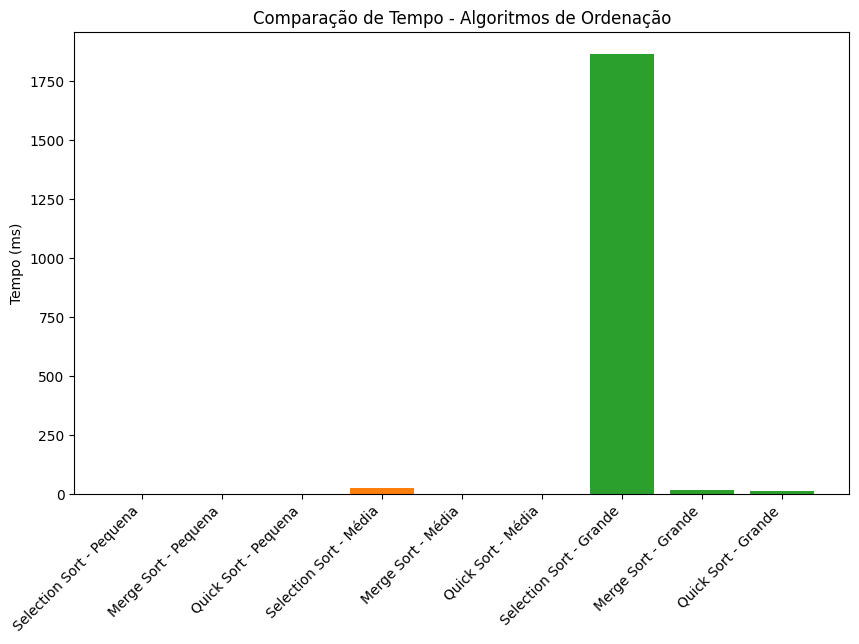

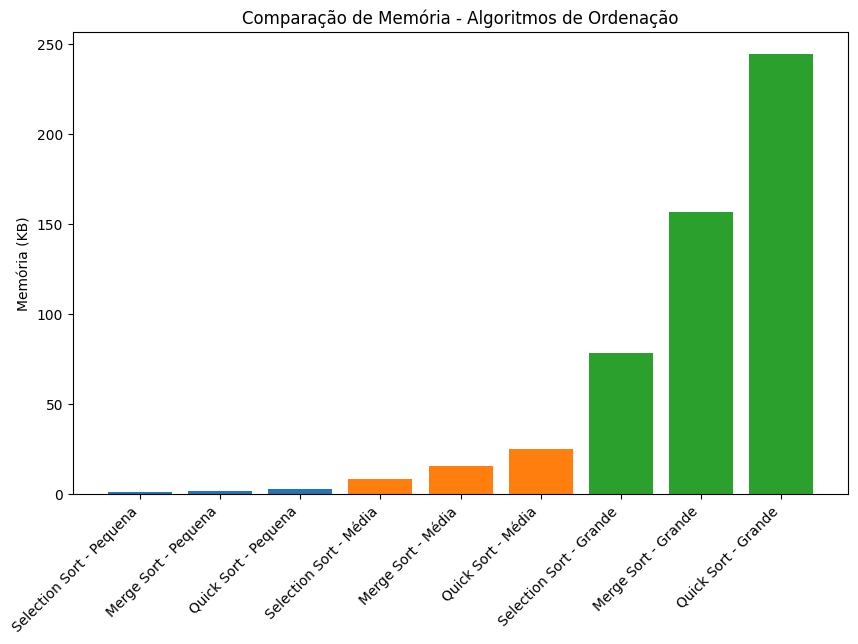

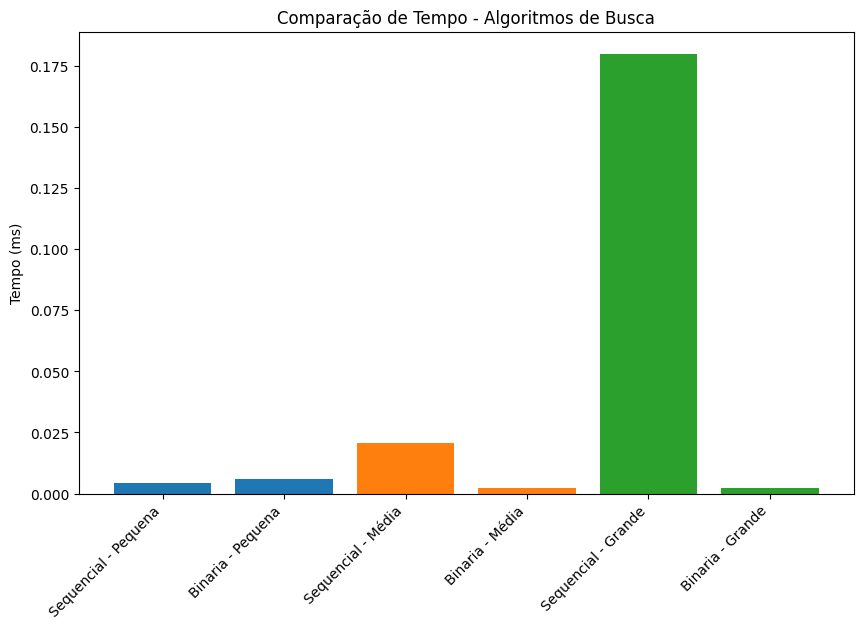

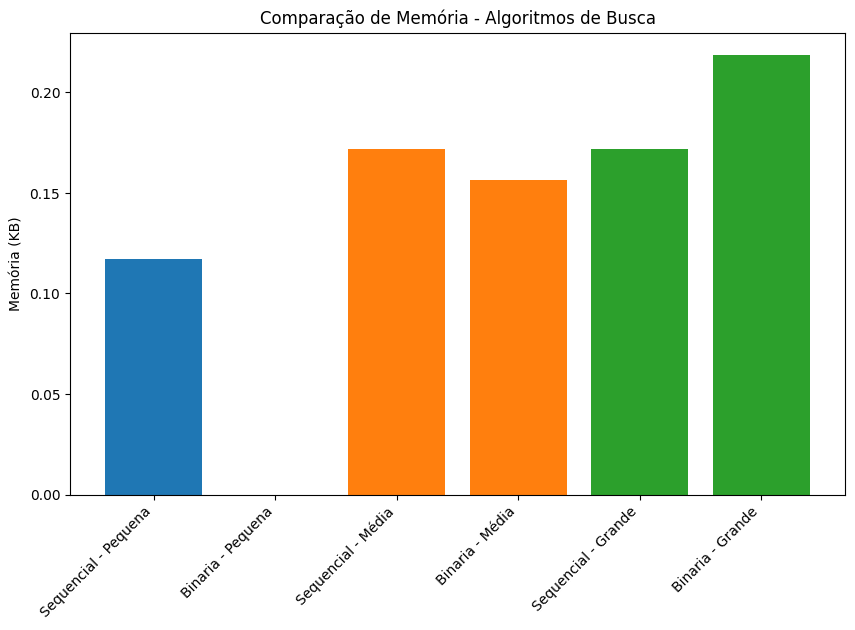

In [4]:
# Gráfico de Ordenação - Tempo
df_ord = df[df['Categoria'] == 'Ordenação']
plt.figure(figsize=(10,6))
for nome_lista in df_ord['Lista'].unique():
    subset = df_ord[df_ord['Lista'] == nome_lista]
    plt.bar(subset['Algoritmo'] + " - " + nome_lista, subset['Tempo (ms)'])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Tempo (ms)")
plt.title("Comparação de Tempo - Algoritmos de Ordenação")
plt.show()

# Gráfico de Ordenação - Memória
plt.figure(figsize=(10,6))
for nome_lista in df_ord['Lista'].unique():
    subset = df_ord[df_ord['Lista'] == nome_lista]
    plt.bar(subset['Algoritmo'] + " - " + nome_lista, subset['Memória (KB)'])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Memória (KB)")
plt.title("Comparação de Memória - Algoritmos de Ordenação")
plt.show()

# Gráfico de Busca - Tempo
df_busca = df[df['Categoria'] == 'Busca']
plt.figure(figsize=(10,6))
for nome_lista in df_busca['Lista'].unique():
    subset = df_busca[df_busca['Lista'] == nome_lista]
    plt.bar(subset['Algoritmo'] + " - " + nome_lista, subset['Tempo (ms)'])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Tempo (ms)")
plt.title("Comparação de Tempo - Algoritmos de Busca")
plt.show()

# Gráfico de Busca - Memória
plt.figure(figsize=(10,6))
for nome_lista in df_busca['Lista'].unique():
    subset = df_busca[df_busca['Lista'] == nome_lista]
    plt.bar(subset['Algoritmo'] + " - " + nome_lista, subset['Memória (KB)'])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Memória (KB)")
plt.title("Comparação de Memória - Algoritmos de Busca")
plt.show()


## **🧠 ANÁLISE (SPRINT 3):**

- **🔎 Algoritimos de Busca**
    - Busca Sequêncial → simples, mas ineficiente em listas grandes.
    - Busca Binária → muito eficiente (O(log n)), ideal para listas ordenadas.

- **🔃 Algoritimos de Ordenação**
    - Selection Sort → útil apenas para listas pequenas.
    - Merge Sort → estável e eficiente para qualquer tamanho.
    - Quick Sort → mais rápido em listas grandes, mas consome um pouco mais de memória.

✅ **Conclusão:**
- Para **ordenar listas grandes**, a melhor opção é o **Quick Sort** (ou Merge Sort se precisar de estabilidade).
- Para **buscar em listas grandes**, a melhor opção é o **Busca Binária**.
- Para listas pequenas, qualquer algoritmo atende, mas Selection Sort e Sequencial só são justificáveis por didática.

# **🎯 RELATÓRIO 02 (SPRINT 4):**
# **📦 COMPARAÇÃO DE ALGORITIMOS DE PLANO DE REPOSIÇÃO:**

## **📋 TESTES (SPRINT 4):**

In [5]:
# === Parâmetros do experimento ===
id_insumo = 0 # ID do insumo a ser testado
dias = 7
K, h, p = 10.0, 0.1, 2.0

# estoque inicial do insumo (lido do dicionário)
try:
    s0 = insumos['Estoque'][id_insumo]
    nome_insumo = insumos['Nome_Insumo'][id_insumo]
except Exception:
    s0 = 0
    nome_insumo = f"ID {id_insumo}"

# demanda a partir do histórico (fila). Se vier vazia (tudo zero), cria alternativa sintética
demanda = demandaDiaria(nome_insumo, dias)
if sum(demanda) == 0:
    random.seed(42)
    demanda = [max(0, int(random.gauss(50, 12))) for _ in range(dias)]

## **▶️ EXECUÇÃO (SPRINT 4):**

In [6]:
dados_recursivo = executar(lambda: recursivoDP(demanda, K, h, p, s0))
dados_bottomup  = executar(lambda: bottomUpDP(demanda, K, h, p, s0))

(custo_rec, plano_rec) = dados_recursivo["resultado"]
(custo_bu,  plano_bu)  = dados_bottomup["resultado"]

mesmo_custo    = abs(custo_rec - custo_bu) < 1e-6
mesma_politica = plano_rec["Reposicao"].tolist() == plano_bu["Reposicao"].tolist()

# Tabela comparativa (padrão do seu notebook)
df_dp = pd.DataFrame([
    {
        "Algoritmo": "Recursivo com Memorização",
        "Tempo (ms)": round(dados_recursivo["tempo"], 3),
        "Memória (KB)": round(dados_recursivo["memoria"], 2),
        "Custo Total": round(custo_rec, 4)
    },
    {
        "Algoritmo": "Iterativa (Bottom-Up)",
        "Tempo (ms)": round(dados_bottomup["tempo"], 3),
        "Memória (KB)": round(dados_bottomup["memoria"], 2),
        "Custo Total": round(custo_bu, 4)
    }
])

display(df_dp)

if mesmo_custo and mesma_politica:
    print("✅ Ambos os métodos produziram o mesmo custo e política de reposição.")


,Algoritmo,Tempo (ms),Memória (KB),Custo Total
0,Recursivo com Memorização,855.953,611.24,214.9
1,Iterativa (Bottom-Up),1990.659,258.28,214.9


✅ Ambos os métodos produziram o mesmo custo e política de reposição.


## **📊 GRÁFICOS (SPRINT 4):**

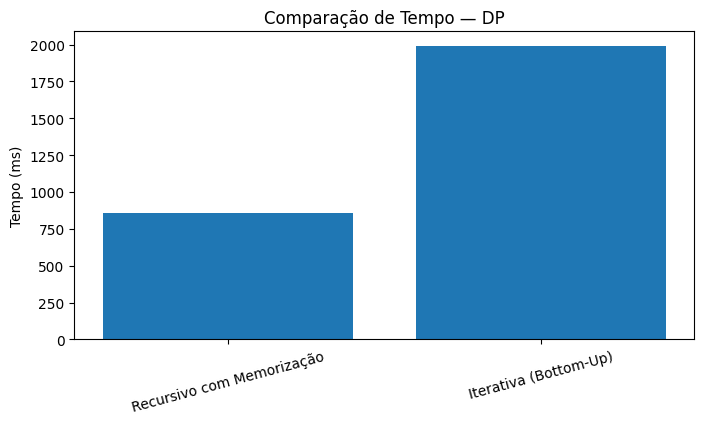

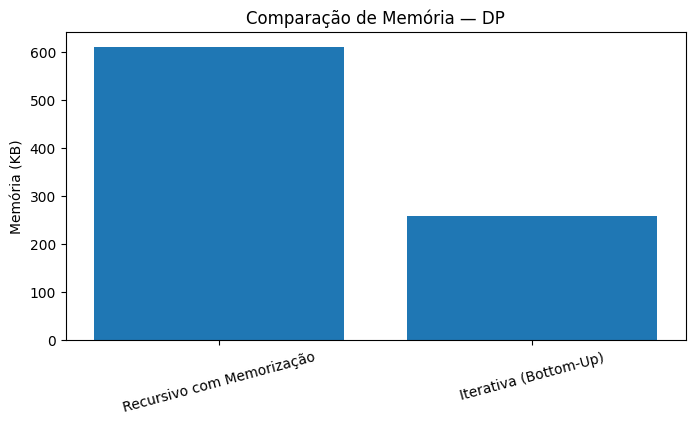

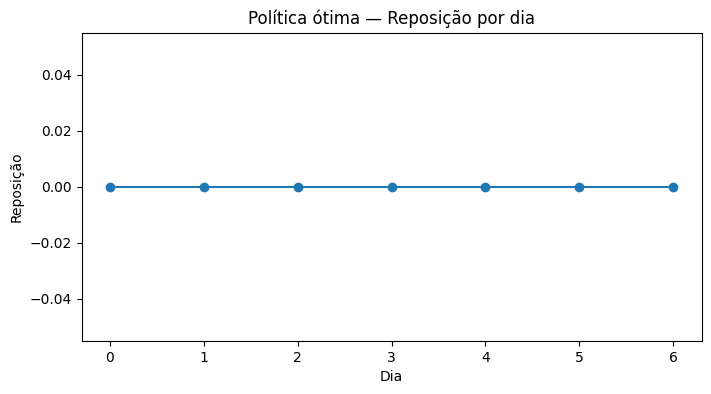

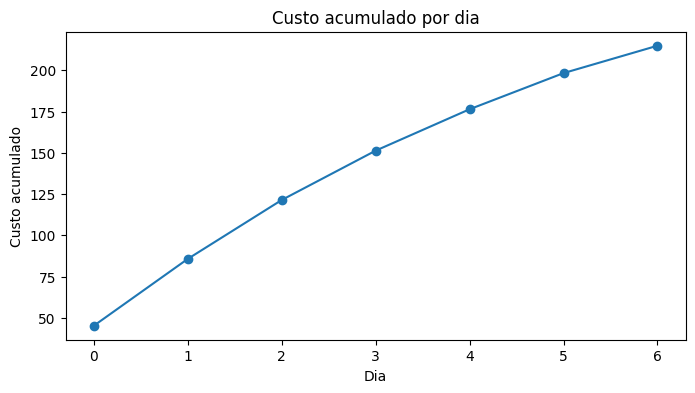

In [7]:
# Gráfico: Tempo (ms)
plt.figure(figsize=(8,4))
plt.bar(df_dp["Algoritmo"], df_dp["Tempo (ms)"])
plt.title("Comparação de Tempo — DP")
plt.ylabel("Tempo (ms)")
plt.xticks(rotation=15)
plt.show()

# Gráfico: Memória (KB)
plt.figure(figsize=(8,4))
plt.bar(df_dp["Algoritmo"], df_dp["Memória (KB)"])
plt.title("Comparação de Memória — DP")
plt.ylabel("Memória (KB)")
plt.xticks(rotation=15)
plt.show()

# Política ótima (reposições) — exibe da versão recursiva (as duas devem coincidir)
plt.figure(figsize=(8,4))
plt.plot(plano_rec["Dia"], plano_rec["Reposicao"], marker="o")
plt.title("Política ótima — Reposição por dia")
plt.xlabel("Dia")
plt.ylabel("Reposição")
plt.show()

# Custo acumulado
plt.figure(figsize=(8,4))
plt.plot(plano_rec["Dia"], plano_rec["Custo_Dia"].cumsum(), marker="o")
plt.title("Custo acumulado por dia")
plt.xlabel("Dia")
plt.ylabel("Custo acumulado")
plt.show()


## **🧠 ANÁLISE (SPRINT 4):**

- **📦 Algoritimos de Plano Ótimo de Reposição**
    - Recursivo com Memorização → excelente para validar a **recorrência** e prototipar; pode crescer em memória/tempo para espaços de estado grandes.
    - Iterativa (Bottom-Up) → mais estável e previsível em instâncias maiores; evita limites de recursão e tende a ser **mais rápido** quando a tabela é densa.

✅ **Conclusão:**
- Para análises rápidas/educacionais ou instâncias pequenas → **Recursivo+Memo** é suficiente.
- Para produção/horizontes maiores → **Bottom-up** é preferível (robustez e desempenho).